In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# پس از ران شدن مسیرهای اولیه حاصل از درخت در الگوریتم ژنتیک، خروجی الگوریتم ژنتیک بارگذاری می شود

genetic_tree=pd.read_csv(r'D:\learning_pymc35\Thesis_Code\Steiner_Algorithm\mashhad\Steiner_leaf_paths_output\masir.txt.run.chromosome.txt')
genetic_tree_fitness=[]
genetic_tree_fitness_index=[]
genetic_tree_len_genes=[]
for i in range(genetic_tree.shape[0]):
    if genetic_tree['index'][i]==0:
        genetic_tree_fitness_index.append(i)
        genetic_tree_fitness.append(genetic_tree['fitness'][i])
        genetic_tree_len_genes.append(len(genetic_tree["genes"][i]))
genetic_tree.head(n=3)

,generation,index,count,fitness,part1,part2,part3,fk-tk,waiting-time,vehicle-time,covered-demand-0-transfer,covered-demand-1-transfer,total-coverered,uncovered-demand,network-cost,network/graph-cost,genes
0,1,0,312,1368740.0,-8990880.0,10359600.0,0,110183.0,2664810.0,7700150.0,30.4884,68.2711,98.7594,1.24060,10474.6,981.055,71:85:147:153:298:350:490:629:845:1214:1216:12...
1,1,1,293,1497430.0,-8626990.0,10124400.0,0,107008.0,2513270.0,7480080.0,28.1728,68.2449,96.4177,3.58228,10009.6,937.502,246:272:465:716:782:951:1088:1340:1396:1474:15...
2,1,2,354,1767300.0,-8850090.0,10617400.0,0,111359.0,2701110.0,7612940.0,33.7063,63.0049,96.7112,3.28881,11808.2,1105.960,50:67:244:357:442:450:556:664:767:782:806:922:...


In [2]:
# پس از ران شدن مسیرهای اولیه حاصل از الگوریتم دایجسترا در الگوریتم ژنتیک، خروجی الگوریتم ژنتیک بارگذاری می شود
shortest_paths=pd.read_csv(r'E:\learning_pymc3\Thesis_Code\Code\Genetic - kashan\tester\shortest_paths.txt')
shortest_paths_fitness=[]
shortest_paths_fitness_index=[]
for i in range(shortest_paths.shape[0]):
    if shortest_paths['index'][i]==0:
        shortest_paths_fitness_index.append(i)
        shortest_paths_fitness.append(shortest_paths['fitness'][i])
shortest_paths.head(n=3)

,generation,index,count,fitness,part1,part2,part3,fk-tk,waiting-time,vehicle-time,covered-demand-0-transfer,covered-demand-1-transfer,total-coverered,uncovered-demand,network-cost,network/graph-cost,genes
0,1,0,49,-2817080.0,-2969210.0,152130.0,0,36550.9,6393.26,52857,42.4308,57.5692,100,0,4743,456.936,23:44:96:105:109:110:128:149:191:229:279:318:3...
1,1,1,39,-2789330.0,-2914210.0,124879.0,0,34407.5,5285.90,52661,47.9341,52.0659,100,0,4048,389.981,13:85:129:153:161:264:265:331:421:537:568:608:...
2,1,2,52,-2786160.0,-2963660.0,177501.0,0,40888.5,5224.45,53464,48.5977,51.4023,100,0,4948,476.686,1:131:292:308:339:355:359:373:385:393:397:426:...


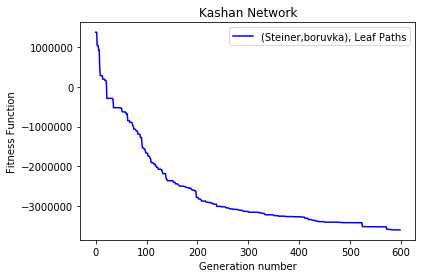

In [5]:
x=range(len(genetic_tree_fitness))
y1=genetic_tree_fitness
#y2=shortest_paths_fitness
plt.plot(x,y1,color='blue',label='(Steiner,boruvka), Leaf Paths')
#plt.plot(x,y2,color='red',label='Shortest Paths')
plt.legend()
plt.title('Kashan Network')
plt.xlabel('Generation number')
plt.ylabel('Fitness Function')
plt.savefig("(Steiner,boruvka)_Leaf_paths_Kashan.jpg",dpi=300,bbox_inches='tight')
plt.show()


In [60]:
# در اینجا فیتنس کروموزوم هایی با کمترین تعداد ژن شناسایی می شود و از این ژن ها برای ارزیابی پارامترها در الگوریتم ژنتیک استفاده می شود.

# شمارنده برای کروموزوم با کمترین مسیر یا ژن
counter=[]

# فیتنس کروموزوم با کمترین ژن
fitness=[]

# مسیرها یا ژن ها در کروموزم با کمترین ژن
genes_name=[]
min=len(genetic_tree["genes"][0])
for i in genetic_tree_len_genes:
    if i < min:
        min=i
for i in range(genetic_tree.shape[0]):
    if len(genetic_tree["genes"][i])==min:
        counter.append(i)
        fitness.append(genetic_tree["fitness"][i])
        genes_name.append(genetic_tree["genes"][i])
genes_name=[i.split(":") for i in genes_name]        
genes_name

[['40',
  '60',
  '67',
  '77',
  '81',
  '93',
  '111',
  '124',
  '167',
  '184',
  '195',
  '201',
  '210'],
 ['96',
  '99',
  '102',
  '109',
  '120',
  '123',
  '154',
  '161',
  '163',
  '172',
  '212',
  '226'],
 ['40',
  '60',
  '67',
  '77',
  '81',
  '93',
  '111',
  '124',
  '167',
  '184',
  '195',
  '201',
  '210'],
 ['31',
  '59',
  '72',
  '76',
  '86',
  '96',
  '111',
  '122',
  '160',
  '189',
  '206',
  '212',
  '226'],
 ['96',
  '99',
  '102',
  '109',
  '120',
  '123',
  '154',
  '161',
  '163',
  '172',
  '212',
  '226'],
 ['96',
  '99',
  '102',
  '109',
  '120',
  '123',
  '154',
  '161',
  '163',
  '172',
  '212',
  '226'],
 ['96',
  '99',
  '102',
  '109',
  '120',
  '123',
  '154',
  '161',
  '163',
  '172',
  '212',
  '226'],
 ['96',
  '99',
  '102',
  '109',
  '120',
  '123',
  '154',
  '161',
  '163',
  '172',
  '212',
  '226'],
 ['40',
  '60',
  '67',
  '77',
  '81',
  '93',
  '111',
  '124',
  '167',
  '184',
  '195',
  '212',
  '226'],
 ['40',
  '60',
 

In [62]:
masir=pd.read_csv(r'E:\learning_pymc3\Thesis_Code\Code\Genetic - kashan\tester\masir.txt',header=None)

# مسیرهای منتخب در کروموزم با کمترین ژن یا مسیر در این قسمت جدا شده و در ژنتیک پث دخیره می شوند.
# باید توجه شود که در ژن نیم مجموع کروموزم های با کمترین تعداد ژن یا مسیر در ژنتیک پث ذخیره می شود. بدین ترتیب قبل از ارزیابی باید این کروموزم ها از هم در فایل نت پد جدا شوند
Genetic_paths=open("Genetic_paths26","w")
for item in genes_name:
    for item2 in item:
        Genetic_paths.writelines(f'{masir[0][int(item2)]}\n')
    Genetic_paths.writelines(f'\n')